# YZV311E Data Mining Project Model Development and Evaluation

## Name : Yusuf Faruk Güldemir
## Student ID : 150210302

## Name : Hasan Taha Bağcı
## Student ID : 150210338

## -------------------------------

## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve, auc


from utils.datapreprocess import *
from utils.model import *
from utils.plotdata import *

import warnings
warnings.filterwarnings('ignore')

In [3]:
df_train = pd.read_csv('data/processed_data.csv')

In [4]:
df_train.isna().sum()

id                        0
code_gender               0
flag_own_car              0
flag_own_realty           0
cnt_children              0
amt_income_total          0
name_income_type          0
name_education_type       0
name_family_status        0
name_housing_type         0
age                       0
years_employed            0
flag_work_phone           0
flag_phone                0
flag_email                0
occupation_type           0
cnt_fam_members           0
months_balance            0
status                    0
employment_age_ratio      0
family_size_normalized    0
dtype: int64

## Train-Test Split

In [5]:
X = df_train.drop('status', axis=1)
y = df_train['status']

X_wo_month_bal = X.drop(['months_balance'], axis=1)

- #### Apply SMOTE (Synthetic Minority Oversampling Technique) to balance the data

In [6]:
smoted_X, smoted_y = smote(X, y)

Before SMOTE shape:  (777715, 20) (777715,)
After SMOTE shape:  (1532280, 20) (1532280,)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(smoted_X, smoted_y, test_size=0.2, random_state=101)
X_train_wo_month_bal, X_test_wo_month_bal, y_train_wo_month_bal, y_test_wo_month_bal = train_test_split(X_wo_month_bal, y, test_size=0.2, random_state=101)

## Random Forest Classifier

- Training

In [7]:
rf = randomForest(X_train, y_train, n_estimators=100, max_depth=10, max_features='auto', min_samples_split=2, min_samples_leaf=1, bootstrap=True)
rf_sm = randomForest(X_train_sm, y_train_sm, n_estimators=100, max_depth=10, max_features='auto', min_samples_split=2, min_samples_leaf=1, bootstrap=True)
rf_wo_month_bal = randomForest(X_train_wo_month_bal, y_train_wo_month_bal, n_estimators=100, max_depth=10, max_features='auto', min_samples_split=2, min_samples_leaf=1, bootstrap=True)

- Testing

In [8]:
rf_pred = rf.predict(X_test)
rf_pred_sm = rf_sm.predict(X_test_sm)
rf_pred_wo_month_bal = rf_wo_month_bal.predict(X_test_wo_month_bal)

print("Prediction on test data without SMOTE: ", accuracy_score(y_test, rf_pred))
print("Prediction on test data with SMOTE: ", accuracy_score(y_test_sm, rf_pred_sm))
print("Prediction on test data without month_balance column: ", accuracy_score(y_test_wo_month_bal, rf_pred_wo_month_bal))

Prediction on test data without SMOTE:  0.9856759867046412
Prediction on test data with SMOTE:  0.8528793693058709
Prediction on test data without month_balance column:  0.9854573976328089


- Print Metrics

In [9]:
print("Metrics on test data without SMOTE: \n")
printmetrics(y_test, rf_pred)
print("Metrics on test data with SMOTE: \n")
printmetrics(y_test_sm, rf_pred_sm)
print("Metrics on test data without month_balance column: \n")
printmetrics(y_test_wo_month_bal, rf_pred_wo_month_bal)

Metrics on test data without SMOTE: 

Accuracy:  0.9856759867046412
Recall:  0.999980428102635
Precision:  0.985691594374385
F1:  0.9927846002383544
ROC AUC:  0.5081688170575067
MSE:  0.01432401329535884
Metrics on test data with SMOTE: 

Accuracy:  0.8528793693058709
Recall:  0.8893104510278035
Precision:  0.8279899212367838
F1:  0.857555384245978
ROC AUC:  0.8530264206467919
MSE:  0.147120630694129
Metrics on test data without month_balance column: 

Accuracy:  0.9854573976328089
Recall:  0.999980428102635
Precision:  0.9854761246520121
F1:  0.992675297424373
ROC AUC:  0.5006533440247922
MSE:  0.014542602367191066


- Confusion Matrix

Confusion Matrix: 



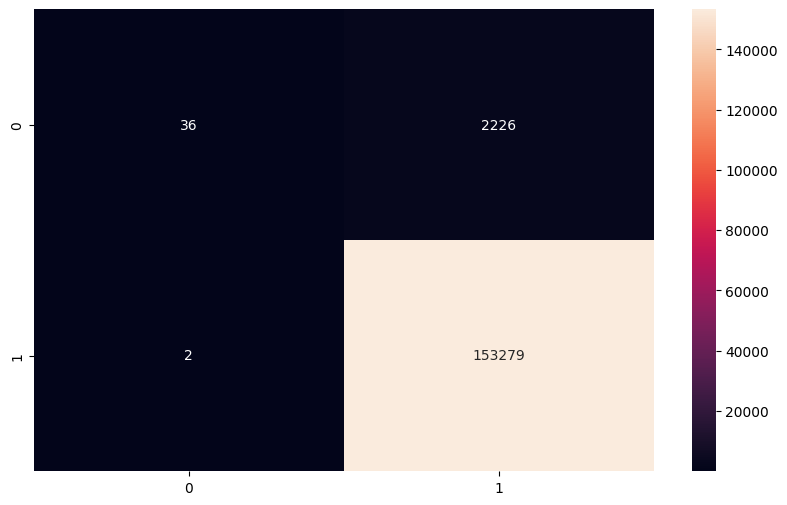

Confusion Matrix with SMOTE Model: 



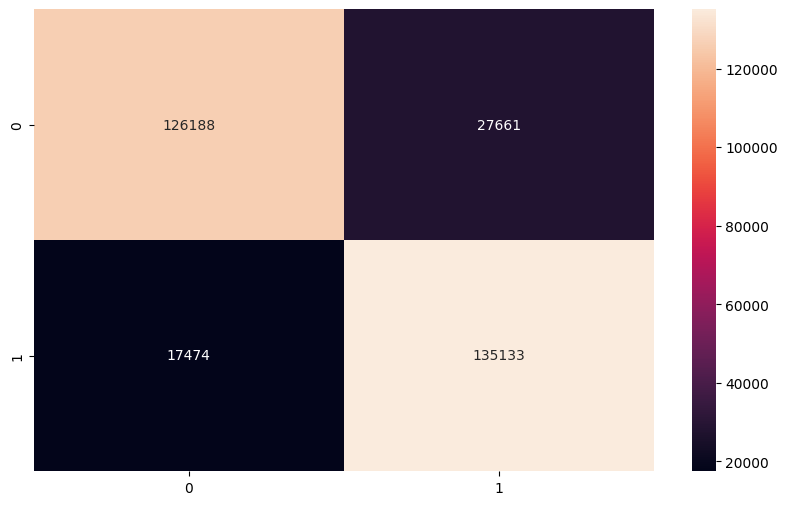

Confusion Matrix without month_balance column: 



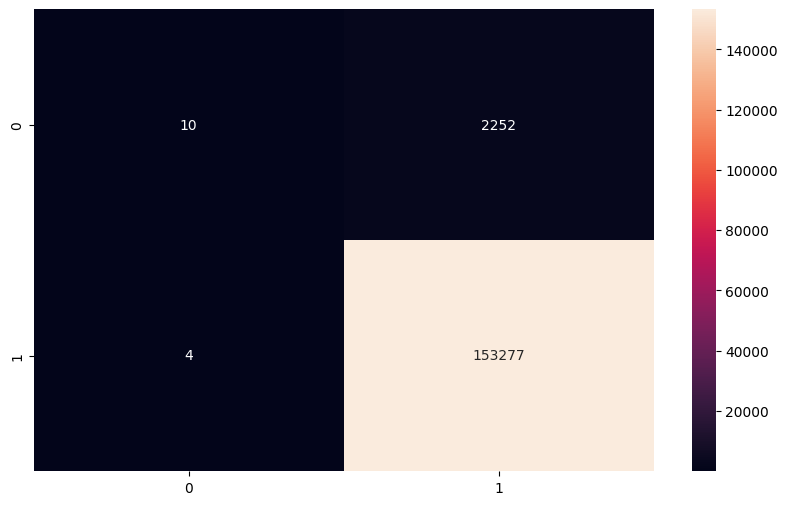

array([[    10,   2252],
       [     4, 153277]])

In [11]:
print("Confusion Matrix: \n")
confusionmatrix(y_test, rf_pred)
print("Confusion Matrix with SMOTE Model: \n")
confusionmatrix(y_test_sm, rf_pred_sm)
print("Confusion Matrix without month_balance column: \n")
confusionmatrix(y_test_wo_month_bal, rf_pred_wo_month_bal)

- Feature Importance

Feature Importance: 



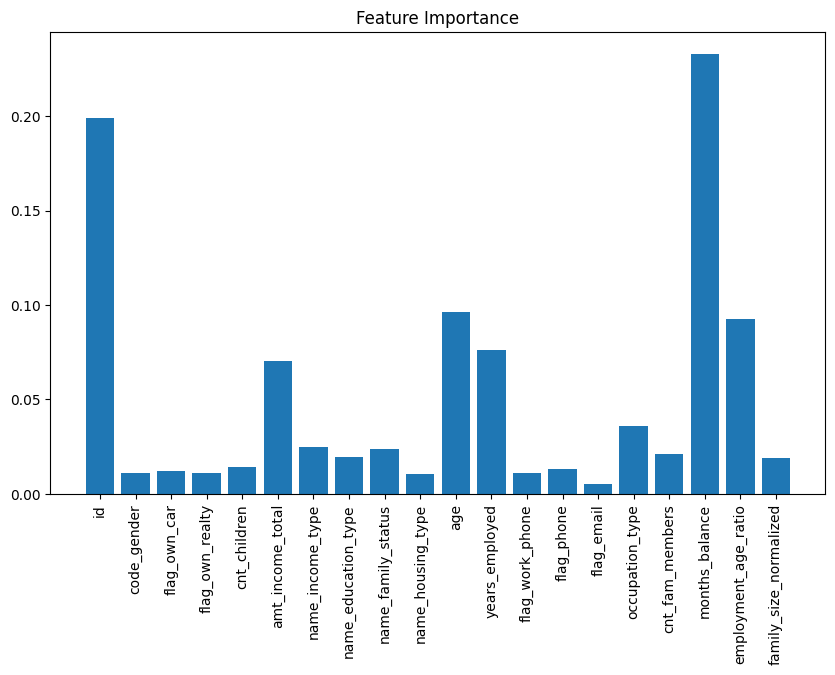

Feature Importance with SMOTE Model: 



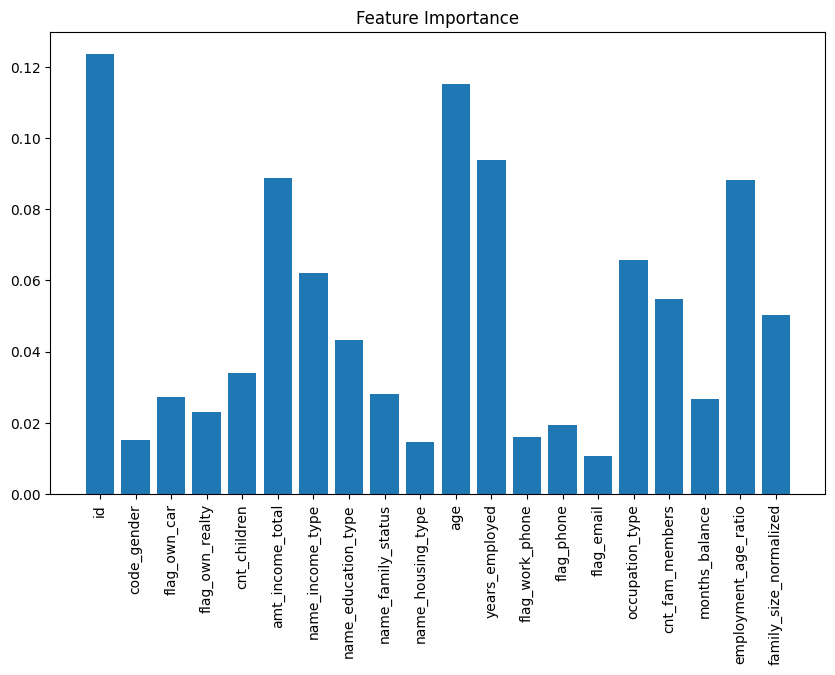

Feature Importance without month_balance column: 



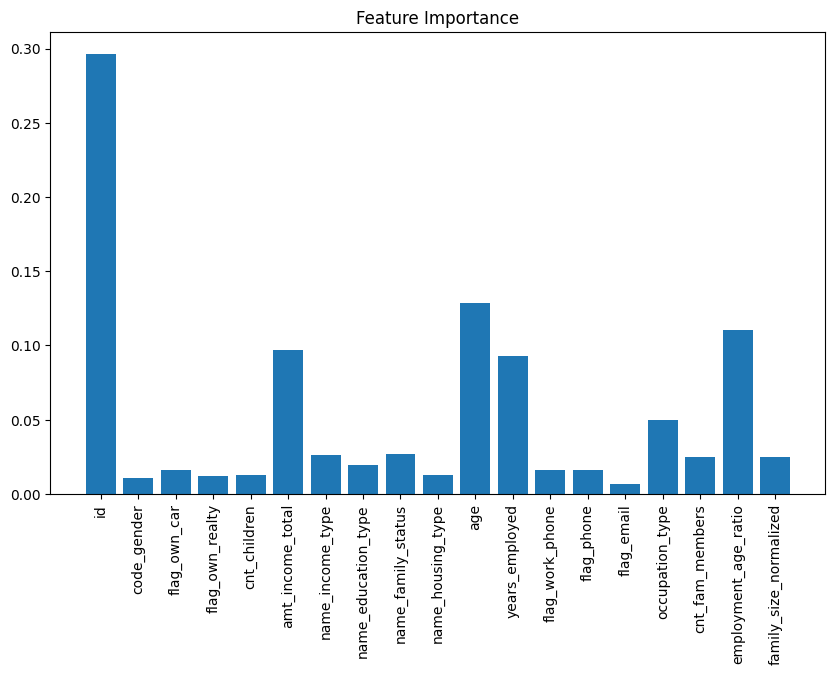

In [12]:
print("Feature Importance: \n")
plotfeatureimportance(rf, X_train)
print("Feature Importance with SMOTE Model: \n")
plotfeatureimportance(rf_sm, X_train_sm)
print("Feature Importance without month_balance column: \n")
plotfeatureimportance(rf_wo_month_bal, X_train_wo_month_bal)

- PR Curve

PR Curve: 



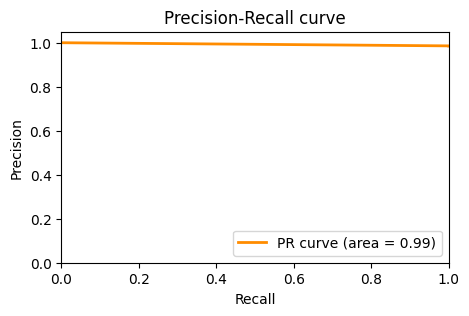

PR Curve with SMOTE Model: 



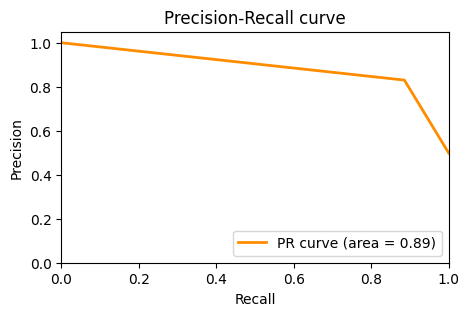

PR Curve without month_balance column: 



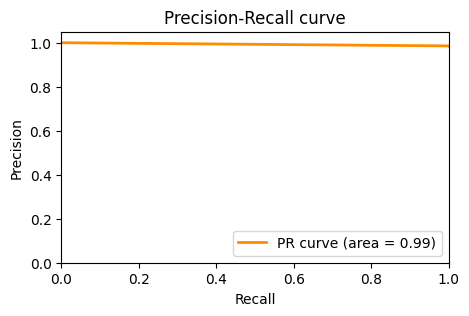

In [13]:
print("PR Curve: \n")
plotpr(y_test, rf_pred)
print("PR Curve with SMOTE Model: \n")
plotpr(y_test_sm, rf_pred_sm)
print("PR Curve without month_balance column: \n")
plotpr(y_test_wo_month_bal, rf_pred_wo_month_bal)

- ROC Curve

ROC Curve: 



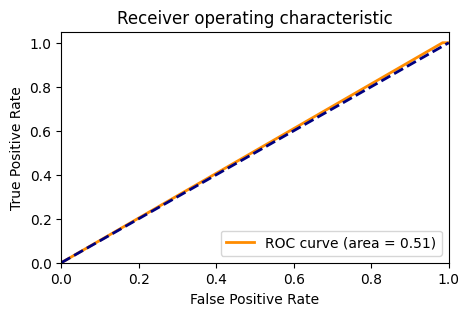

ROC Curve with SMOTE Model: 



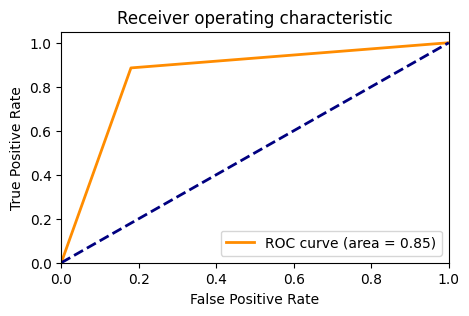

ROC Curve without month_balance column: 



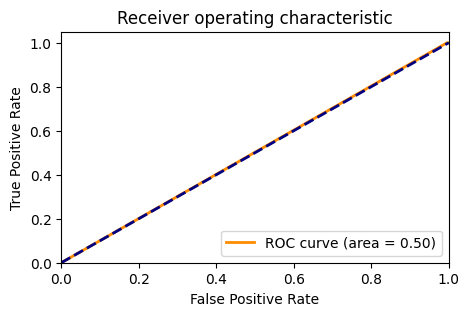

In [14]:
print("ROC Curve: \n")
plotroc(y_test, rf_pred)
print("ROC Curve with SMOTE Model: \n")
plotroc(y_test_sm, rf_pred_sm)
print("ROC Curve without month_balance column: \n")
plotroc(y_test_wo_month_bal, rf_pred_wo_month_bal)

- Learning Curve

Learning Curve: 



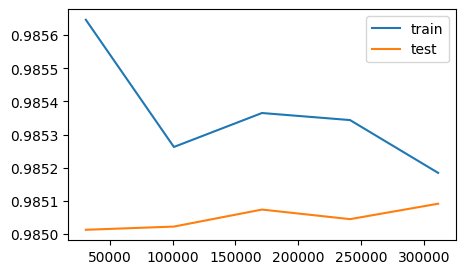

Learning Curve with SMOTE Model: 



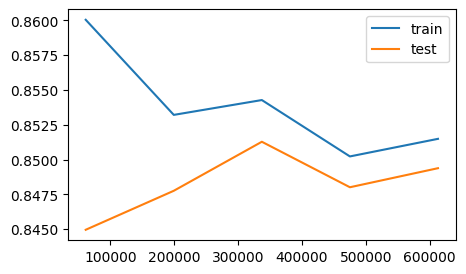

Learning Curve without month_balance column: 



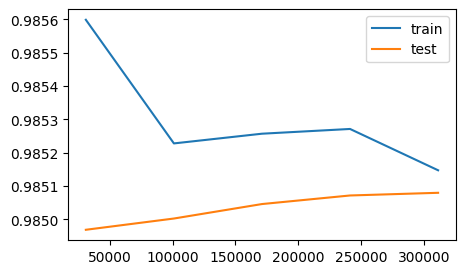

In [15]:
print("Learning Curve: \n")
plotlearningcurve(rf, X_train, y_train)
print("Learning Curve with SMOTE Model: \n")
plotlearningcurve(rf_sm, X_train_sm, y_train_sm)
print("Learning Curve without month_balance column: \n")
plotlearningcurve(rf_wo_month_bal, X_train_wo_month_bal, y_train_wo_month_bal)

- Validation Curve

Validation Curve: 



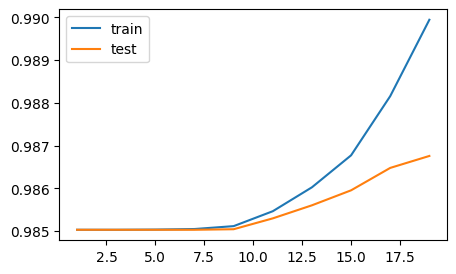

Validation Curve with SMOTE Model: 



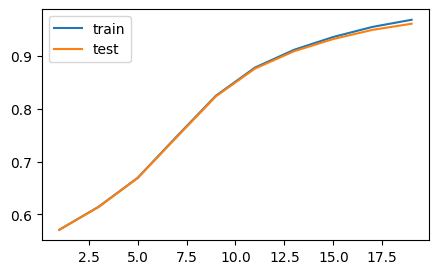

Validation Curve without month_balance column: 



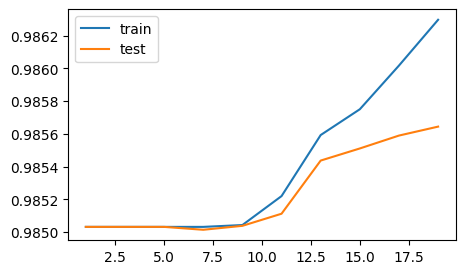

In [10]:
print("Validation Curve: \n")
plotValidationCurve(rf, X_train, y_train, 'max_depth', np.arange(1, 20, 2))
print("Validation Curve with SMOTE Model: \n")
plotValidationCurve(rf_sm, X_train_sm, y_train_sm, 'max_depth', np.arange(1, 20, 2))
print("Validation Curve without month_balance column: \n")
plotValidationCurve(rf_wo_month_bal, X_train_wo_month_bal, y_train_wo_month_bal, 'max_depth', np.arange(1, 20, 2))

## Decision Tree

- Training

In [11]:
dt = decisionTree(X_train, y_train, max_depth=10, max_features='auto', min_samples_split=2, min_samples_leaf=1)
dt_sm = decisionTree(X_train_sm, y_train_sm, max_depth=10, max_features='auto', min_samples_split=2, min_samples_leaf=1)
dt_wo_month_bal = decisionTree(X_train_wo_month_bal, y_train_wo_month_bal, max_depth=10, max_features='auto', min_samples_split=2, min_samples_leaf=1)

- Testing

In [12]:
dt_pred = dt.predict(X_test)
dt_pred_sm = dt_sm.predict(X_test_sm)
dt_pred_wo_month_bal = dt_wo_month_bal.predict(X_test_wo_month_bal)

print("Prediction on test data without SMOTE: ", accuracy_score(y_test, dt_pred))
print("Prediction on test data with SMOTE: ", accuracy_score(y_test_sm, dt_pred_sm))
print("Prediction on test data without month_balance column: ", accuracy_score(y_test_wo_month_bal, dt_pred_wo_month_bal))

Prediction on test data without SMOTE:  0.985547404897681
Prediction on test data with SMOTE:  0.7047961208134284
Prediction on test data without month_balance column:  0.9856566994335971


- Print Metrics

In [13]:
print("Metrics on test data without SMOTE: \n")
printmetrics(y_test, dt_pred)
print("Metrics on test data with SMOTE: \n")
printmetrics(y_test_sm, dt_pred_sm)
print("Metrics on test data without month_balance column: \n")
printmetrics(y_test_wo_month_bal, dt_pred_wo_month_bal)

Metrics on test data without SMOTE: 

Accuracy:  0.985547404897681
Recall:  0.9998303768895036
Precision:  0.985708497076738
F1:  0.9927192169919484
ROC AUC:  0.5087569214244158
MSE:  0.014452595102318973
Metrics on test data with SMOTE: 

Accuracy:  0.7047961208134284
Recall:  0.713905653082755
Precision:  0.699481233226755
F1:  0.7066198384361186
ROC AUC:  0.7048328907601895
MSE:  0.29520387918657165
Metrics on test data without month_balance column: 

Accuracy:  0.9856566994335971
Recall:  0.9996868496421605
Precision:  0.985953827147784
F1:  0.9927728484565771
ROC AUC:  0.5173058474559167
MSE:  0.01434330056640286


- Confusion Matrix

Confusion Matrix: 



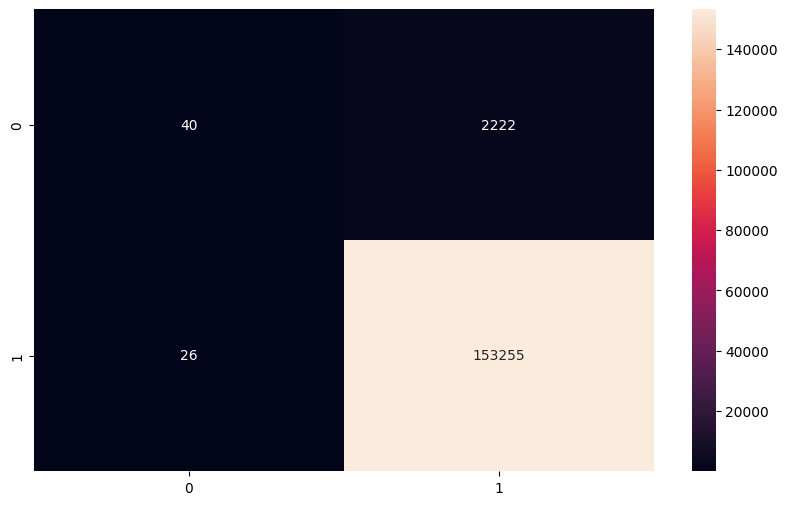

Confusion Matrix with SMOTE Model: 



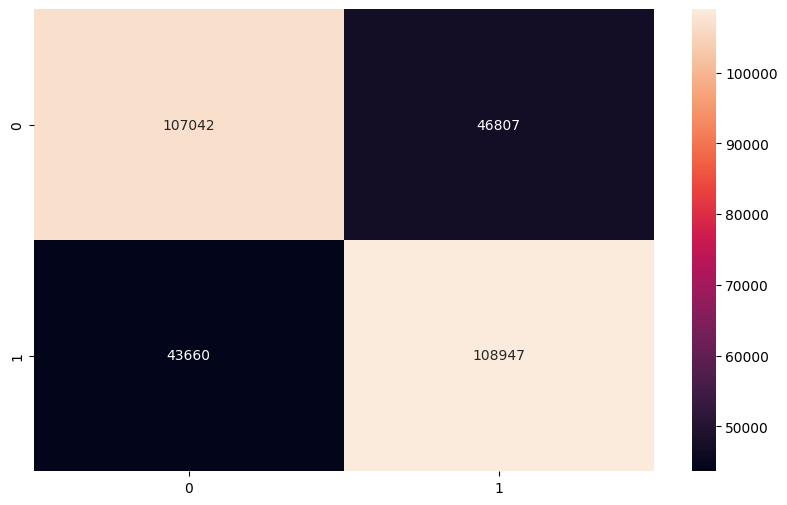

Confusion Matrix without month_balance column: 



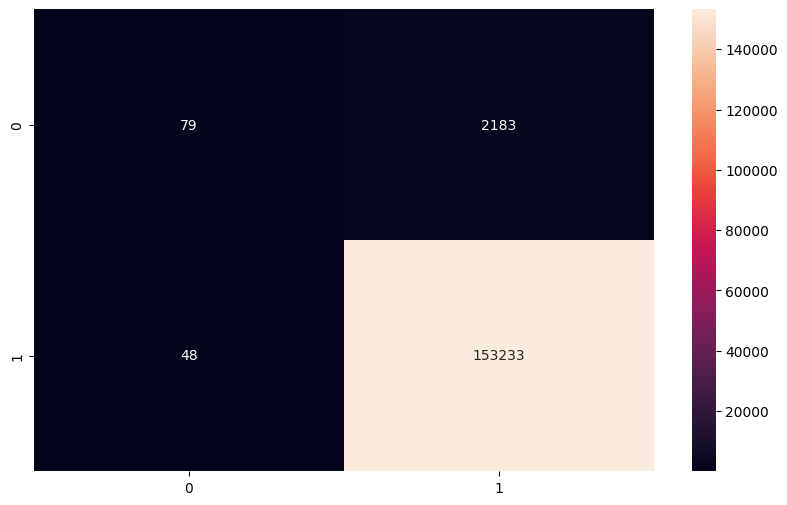

array([[    79,   2183],
       [    48, 153233]])

In [14]:
print("Confusion Matrix: \n")
confusionmatrix(y_test, dt_pred)
print("Confusion Matrix with SMOTE Model: \n")
confusionmatrix(y_test_sm, dt_pred_sm)
print("Confusion Matrix without month_balance column: \n")
confusionmatrix(y_test_wo_month_bal, dt_pred_wo_month_bal)

- Feature Importance

Feature Importance: 



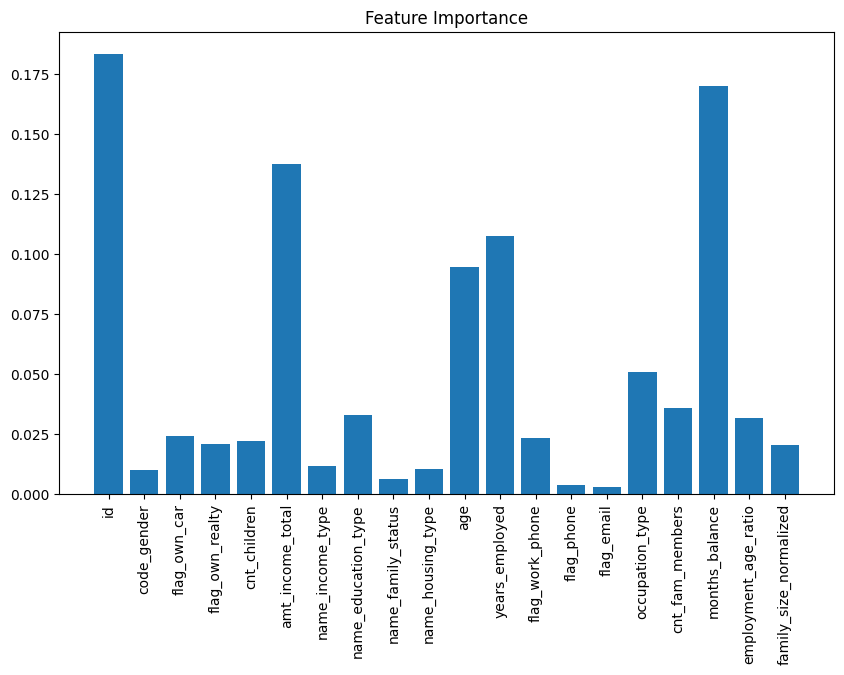

Feature Importance with SMOTE Model: 



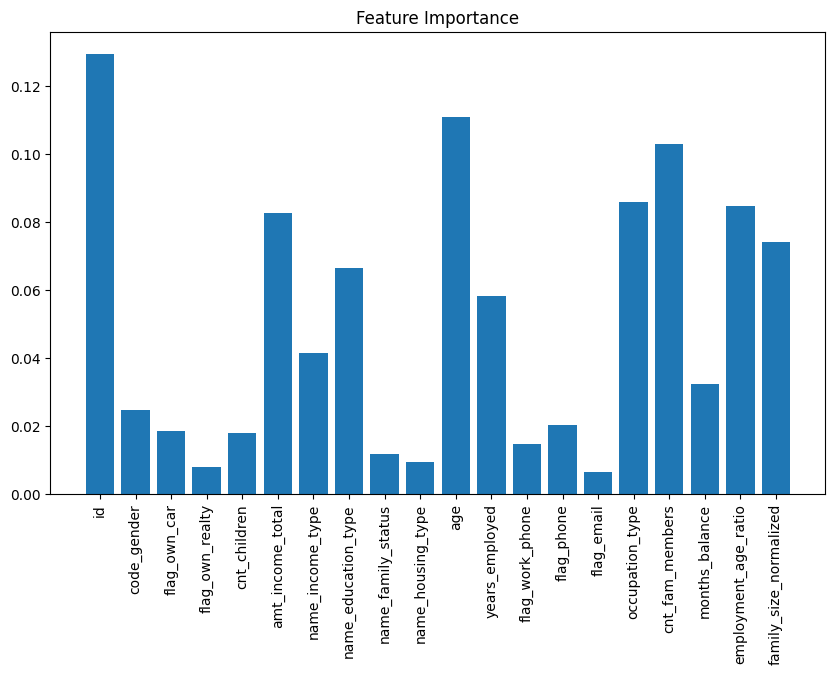

Feature Importance without month_balance column: 



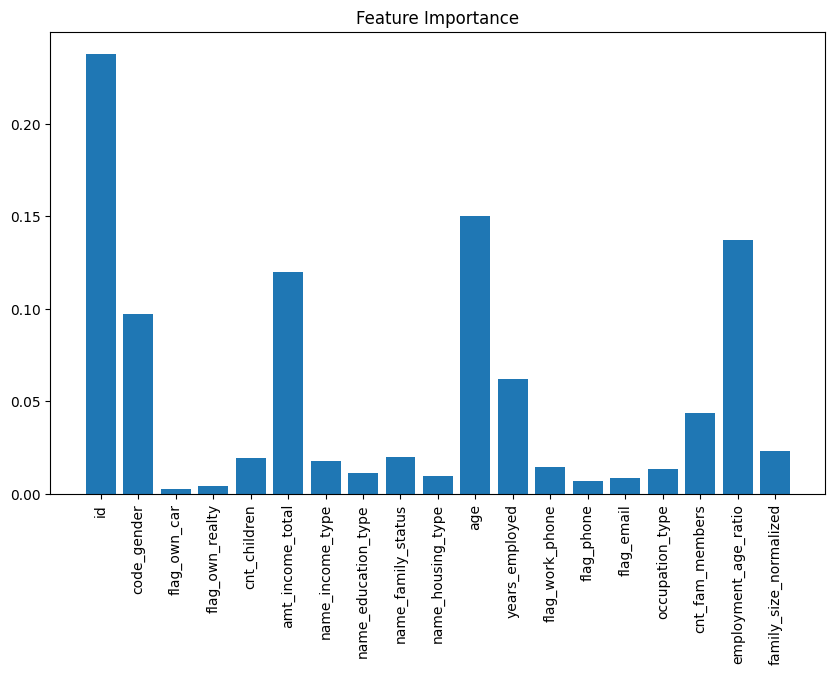

In [15]:
print("Feature Importance: \n")
plotfeatureimportance(dt, X_train)
print("Feature Importance with SMOTE Model: \n")
plotfeatureimportance(dt_sm, X_train_sm)
print("Feature Importance without month_balance column: \n")
plotfeatureimportance(dt_wo_month_bal, X_train_wo_month_bal)

- PR Curve

PR Curve: 



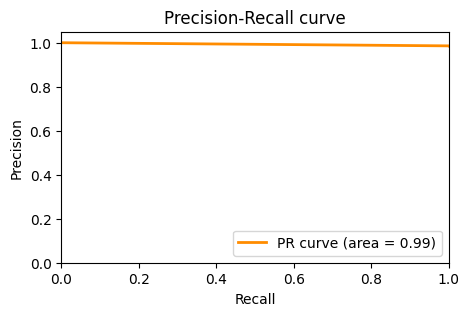

PR Curve with SMOTE Model: 



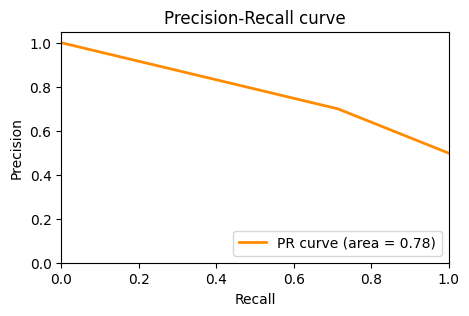

PR Curve without month_balance column: 



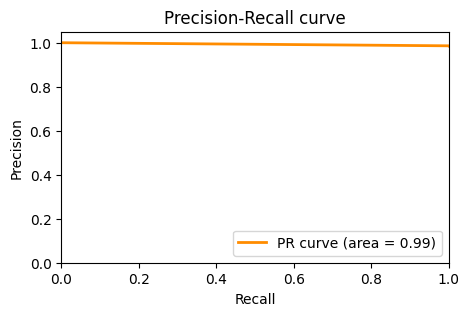

In [16]:
print("PR Curve: \n")
plotpr(y_test, dt_pred)
print("PR Curve with SMOTE Model: \n")
plotpr(y_test_sm, dt_pred_sm)
print("PR Curve without month_balance column: \n")
plotpr(y_test_wo_month_bal, dt_pred_wo_month_bal)

- ROC Curve

ROC Curve: 



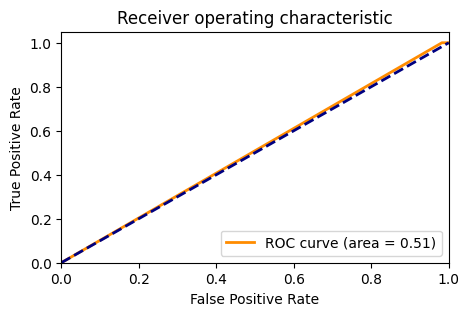

ROC Curve with SMOTE Model: 



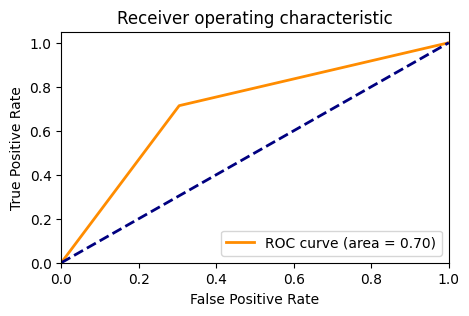

ROC Curve without month_balance column: 



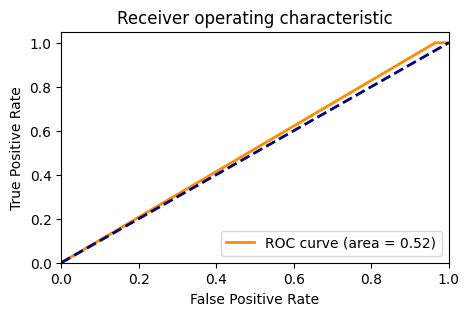

In [17]:
print("ROC Curve: \n")
plotroc(y_test, dt_pred)
print("ROC Curve with SMOTE Model: \n")
plotroc(y_test_sm, dt_pred_sm)
print("ROC Curve without month_balance column: \n")
plotroc(y_test_wo_month_bal, dt_pred_wo_month_bal)

- Learning Curve

Learning Curve: 



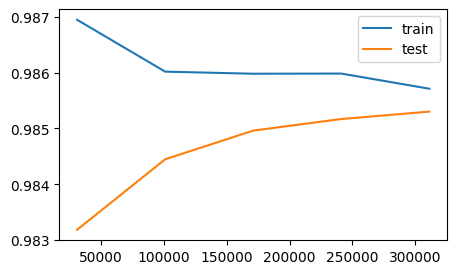

Learning Curve with SMOTE Model: 



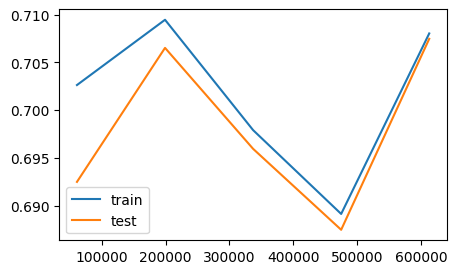

Learning Curve without month_balance column: 



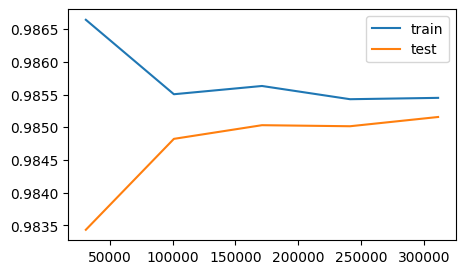

In [18]:
print("Learning Curve: \n")
plotlearningcurve(dt, X_train, y_train)
print("Learning Curve with SMOTE Model: \n")
plotlearningcurve(dt_sm, X_train_sm, y_train_sm)
print("Learning Curve without month_balance column: \n")
plotlearningcurve(dt_wo_month_bal, X_train_wo_month_bal, y_train_wo_month_bal)

- Validation Curve

Validation Curve: 



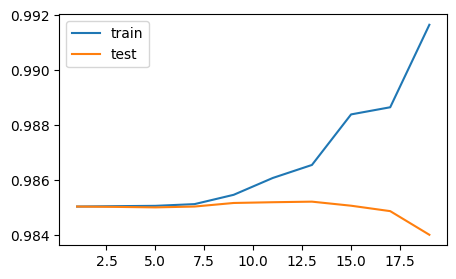

Validation Curve with SMOTE Model: 



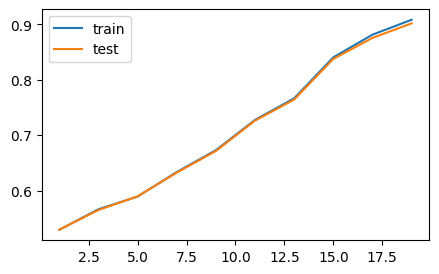

Validation Curve without month_balance column: 



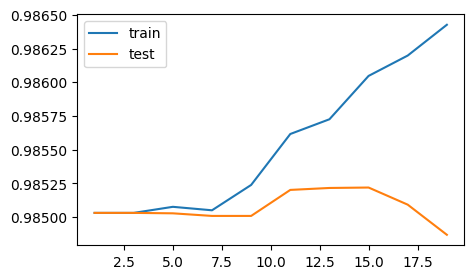

In [19]:
print("Validation Curve: \n")
plotValidationCurve(dt, X_train, y_train, 'max_depth', np.arange(1, 20, 2))
print("Validation Curve with SMOTE Model: \n")
plotValidationCurve(dt_sm, X_train_sm, y_train_sm, 'max_depth', np.arange(1, 20, 2))
print("Validation Curve without month_balance column: \n")
plotValidationCurve(dt_wo_month_bal, X_train_wo_month_bal, y_train_wo_month_bal, 'max_depth', np.arange(1, 20, 2))

## XGBoost

In [20]:
xgb = xgboost(X_train, y_train, max_depth=10, learning_rate=0.1, n_estimators=100, objective='binary:logistic', booster='gbtree', n_jobs=1)
xgb_sm = xgboost(X_train_sm, y_train_sm, max_depth=10, learning_rate=0.1, n_estimators=100, objective='binary:logistic', booster='gbtree', n_jobs=1)
xgb_wo_month_bal = xgboost(X_train_wo_month_bal, y_train_wo_month_bal, max_depth=10, learning_rate=0.1, n_estimators=100, objective='binary:logistic', booster='gbtree', n_jobs=1)

In [21]:
xgb_pred = xgb.predict(X_test)
xgb_pred_sm = xgb_sm.predict(X_test_sm)
xgb_pred_wo_month_bal = xgb_wo_month_bal.predict(X_test_wo_month_bal)

print("Prediction on test data without SMOTE: ", accuracy_score(y_test, xgb_pred))
print("Prediction on test data with SMOTE: ", accuracy_score(y_test_sm, xgb_pred_sm))
print("Prediction on test data without month_balance column: ", accuracy_score(y_test_wo_month_bal, xgb_pred_wo_month_bal))

Prediction on test data without SMOTE:  0.9862031721131778
Prediction on test data with SMOTE:  0.9233690970318741
Prediction on test data without month_balance column:  0.9857788521502092


- Print Metrics

In [22]:
print("Metrics on test data without SMOTE: \n")
printmetrics(y_test, xgb_pred)
print("Metrics on test data with SMOTE: \n")
printmetrics(y_test_sm, xgb_pred_sm)
print("Metrics on test data without month_balance column: \n")
printmetrics(y_test_wo_month_bal, xgb_pred_wo_month_bal)

Metrics on test data without SMOTE: 

Accuracy:  0.9862031721131778
Recall:  0.999373699284321
Precision:  0.9867942152220827
F1:  0.9930441208883818
ROC AUC:  0.5465480344343798
MSE:  0.013796827886822294
Metrics on test data with SMOTE: 

Accuracy:  0.9233690970318741
Recall:  0.9121403343228031
Precision:  0.9325004186903366
F1:  0.922208015052239
ROC AUC:  0.9233237729696941
MSE:  0.07663090296812593
Metrics on test data without month_balance column: 

Accuracy:  0.9857788521502092
Recall:  0.9997129455053138
Precision:  0.9860493549113606
F1:  0.9928341421379653
ROC AUC:  0.5206345452548673
MSE:  0.014221147849790733


- Confusion Matrix

Confusion Matrix: 



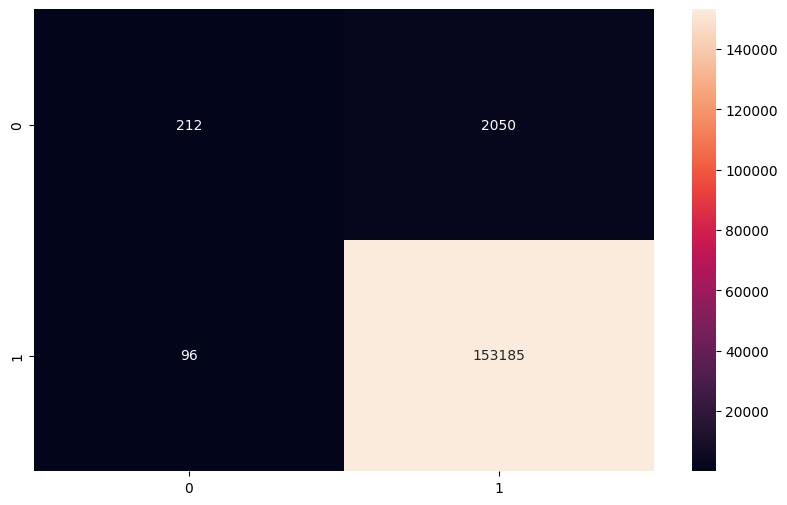

Confusion Matrix with SMOTE Model: 



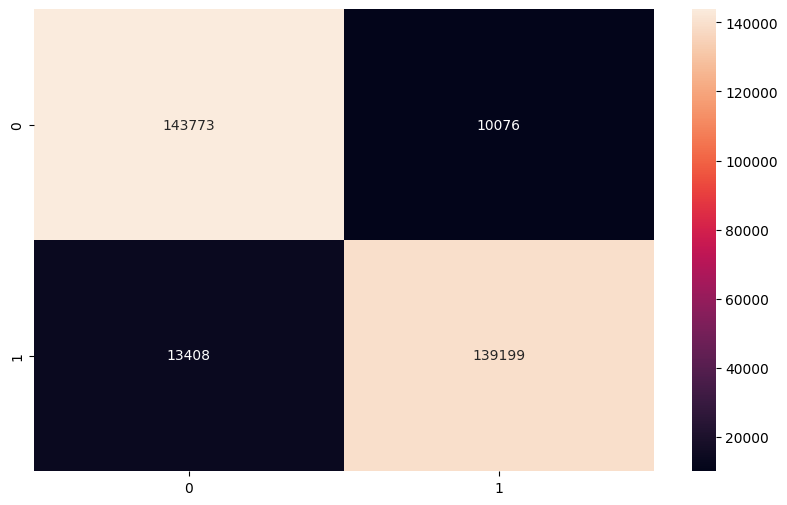

Confusion Matrix without month_balance column: 



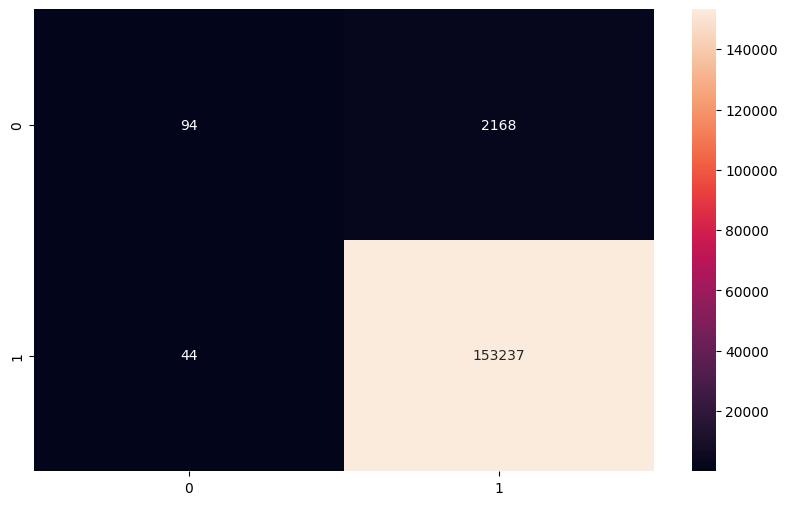

array([[    94,   2168],
       [    44, 153237]])

In [23]:
print("Confusion Matrix: \n")
confusionmatrix(y_test, xgb_pred)
print("Confusion Matrix with SMOTE Model: \n")
confusionmatrix(y_test_sm, xgb_pred_sm)
print("Confusion Matrix without month_balance column: \n")
confusionmatrix(y_test_wo_month_bal, xgb_pred_wo_month_bal)

- Feature Importance

Feature Importance: 



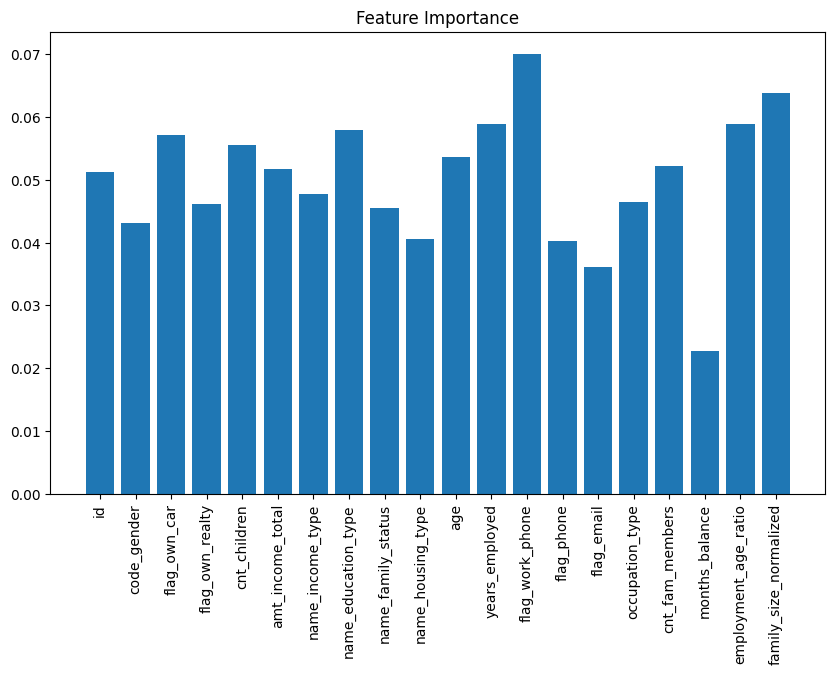

Feature Importance with SMOTE Model: 



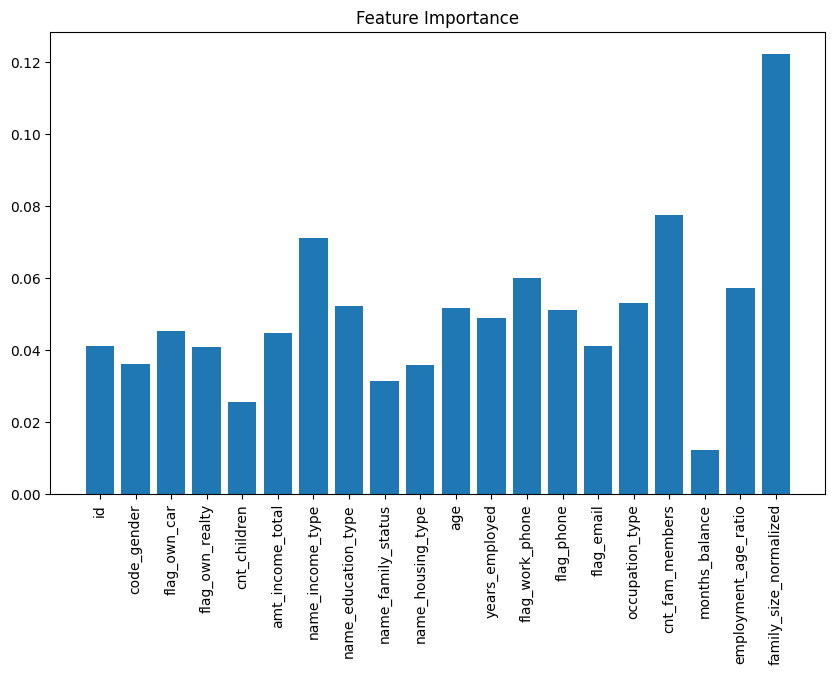

Feature Importance without month_balance column: 



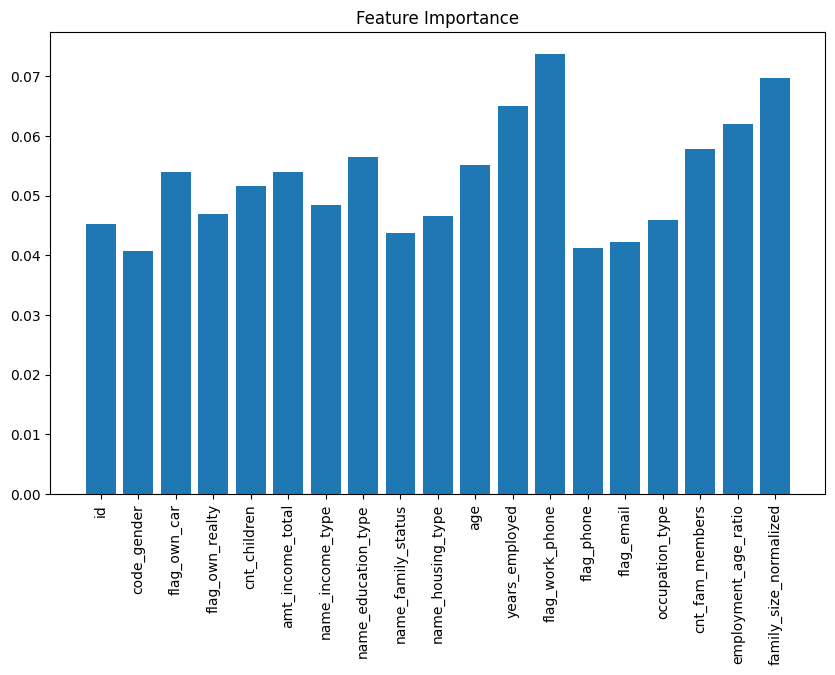

In [24]:
print("Feature Importance: \n")
plotfeatureimportance(xgb, X_train)
print("Feature Importance with SMOTE Model: \n")
plotfeatureimportance(xgb_sm, X_train_sm)
print("Feature Importance without month_balance column: \n")
plotfeatureimportance(xgb_wo_month_bal, X_train_wo_month_bal)

- PR Curve

PR Curve: 



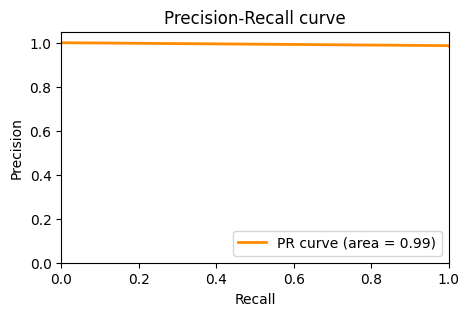

PR Curve with SMOTE Model: 



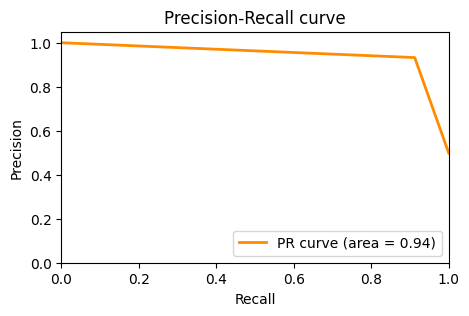

PR Curve without month_balance column: 



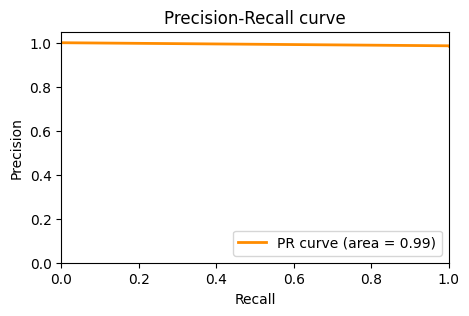

In [25]:
print("PR Curve: \n")
plotpr(y_test, xgb_pred)
print("PR Curve with SMOTE Model: \n")
plotpr(y_test_sm, xgb_pred_sm)
print("PR Curve without month_balance column: \n")
plotpr(y_test_wo_month_bal, xgb_pred_wo_month_bal)

- ROC Curve

ROC Curve: 



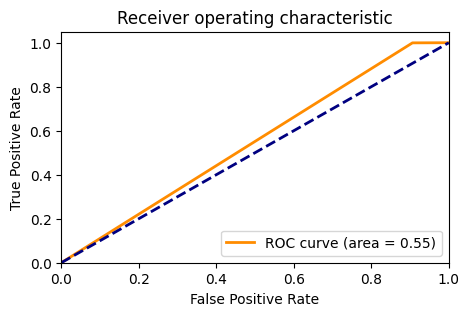

ROC Curve with SMOTE Model: 



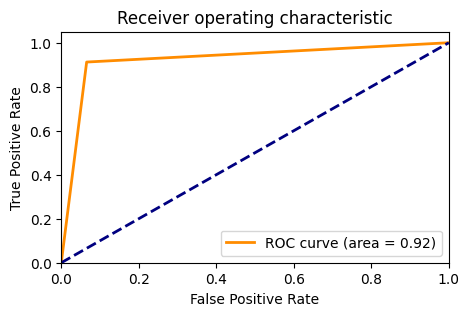

ROC Curve without month_balance column: 



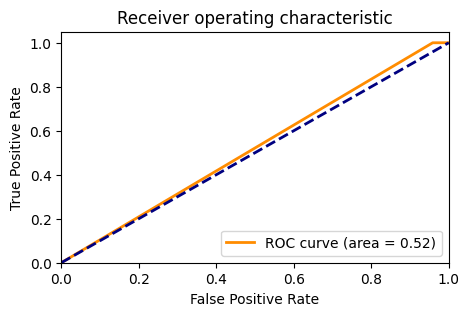

In [26]:
print("ROC Curve: \n")
plotroc(y_test, xgb_pred)
print("ROC Curve with SMOTE Model: \n")
plotroc(y_test_sm, xgb_pred_sm)
print("ROC Curve without month_balance column: \n")
plotroc(y_test_wo_month_bal, xgb_pred_wo_month_bal)

- Learning Curve

Learning Curve: 



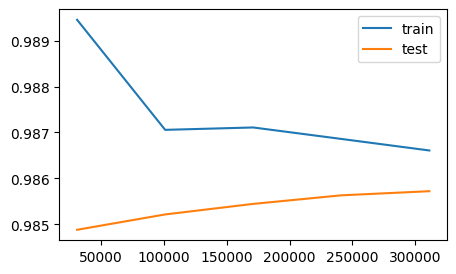

Learning Curve with SMOTE Model: 



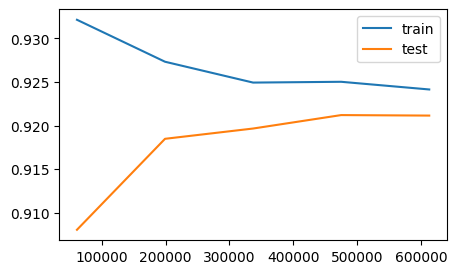

Learning Curve without month_balance column: 



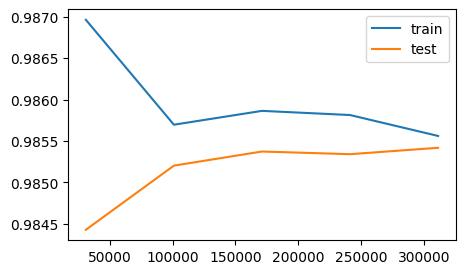

In [27]:
print("Learning Curve: \n")
plotlearningcurve(xgb, X_train, y_train)
print("Learning Curve with SMOTE Model: \n")
plotlearningcurve(xgb_sm, X_train_sm, y_train_sm)
print("Learning Curve without month_balance column: \n")
plotlearningcurve(xgb_wo_month_bal, X_train_wo_month_bal, y_train_wo_month_bal)

- Validation Curve

Validation Curve: 



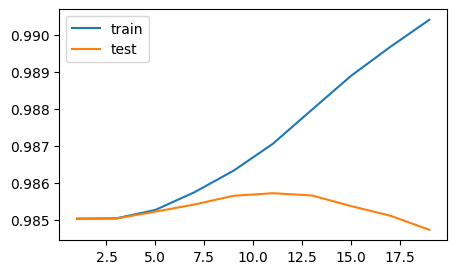

Validation Curve with SMOTE Model: 



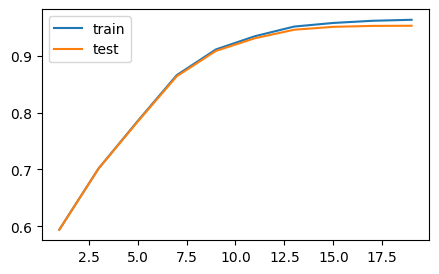

Validation Curve without month_balance column: 



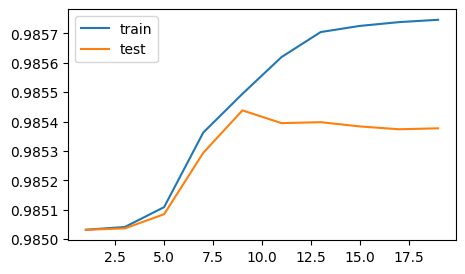

In [28]:
print("Validation Curve: \n")
plotValidationCurve(xgb, X_train, y_train, 'max_depth', np.arange(1, 20, 2))
print("Validation Curve with SMOTE Model: \n")
plotValidationCurve(xgb_sm, X_train_sm, y_train_sm, 'max_depth', np.arange(1, 20, 2))
print("Validation Curve without month_balance column: \n")
plotValidationCurve(xgb_wo_month_bal, X_train_wo_month_bal, y_train_wo_month_bal, 'max_depth', np.arange(1, 20, 2))

## AdaBoost

In [29]:
ada = adaBoost(X_train, y_train, n_estimators=100, learning_rate=1.0, algorithm='SAMME.R')
ada_sm = adaBoost(X_train_sm, y_train_sm, n_estimators=100, learning_rate=1.0, algorithm='SAMME.R')
ada_wo_month_bal = adaBoost(X_train_wo_month_bal, y_train_wo_month_bal, n_estimators=100, learning_rate=1.0, algorithm='SAMME.R')

In [30]:
ada_pred = ada.predict(X_test)
ada_pred_sm = ada_sm.predict(X_test_sm)
ada_pred_wo_month_bal = ada_wo_month_bal.predict(X_test_wo_month_bal)

print("Prediction on test data without SMOTE: ", accuracy_score(y_test, ada_pred))
print("Prediction on test data with SMOTE: ", accuracy_score(y_test_sm, ada_pred_sm))
print("Prediction on test data without month_balance column: ", accuracy_score(y_test_wo_month_bal, ada_pred_wo_month_bal))

Prediction on test data without SMOTE:  0.9854573976328089
Prediction on test data with SMOTE:  0.6446798235309473
Prediction on test data without month_balance column:  0.9854573976328089


- Print Metrics

In [31]:
print("Metrics on test data without SMOTE: \n")
printmetrics(y_test, ada_pred)
print("Metrics on test data with SMOTE: \n")
printmetrics(y_test_sm, ada_pred_sm)
print("Metrics on test data without month_balance column: \n")
printmetrics(y_test_wo_month_bal, ada_pred_wo_month_bal)

Metrics on test data without SMOTE: 

Accuracy:  0.9854573976328089
Recall:  1.0
Precision:  0.9854573976328089
F1:  0.9926754397326633
ROC AUC:  0.5
MSE:  0.014542602367191066
Metrics on test data with SMOTE: 

Accuracy:  0.6446798235309473
Recall:  0.6823015982228863
Precision:  0.632853383253004
F1:  0.6566478946073949
ROC AUC:  0.644831681015128
MSE:  0.3553201764690527
Metrics on test data without month_balance column: 

Accuracy:  0.9854573976328089
Recall:  1.0
Precision:  0.9854573976328089
F1:  0.9926754397326633
ROC AUC:  0.5
MSE:  0.014542602367191066


- Confusion Matrix

Confusion Matrix: 



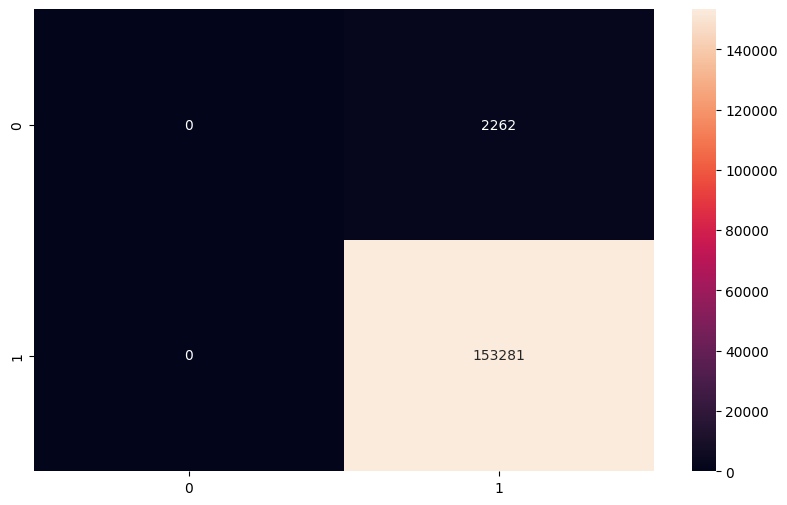

Confusion Matrix with SMOTE Model: 



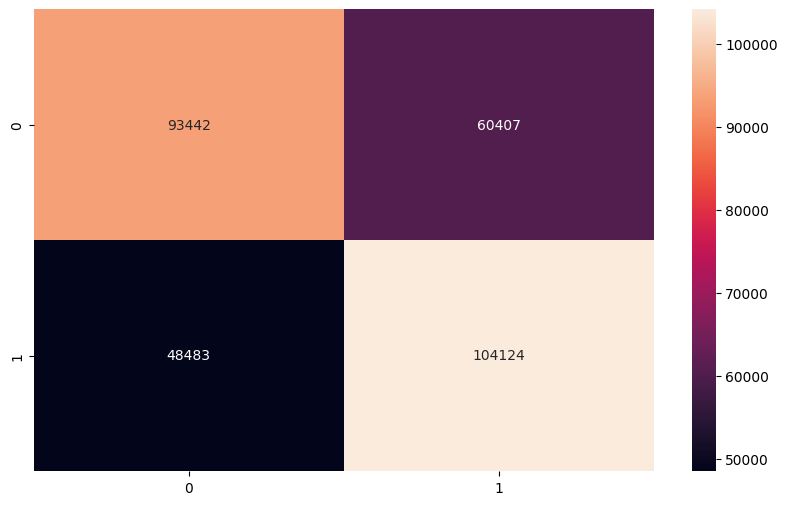

Confusion Matrix without month_balance column: 



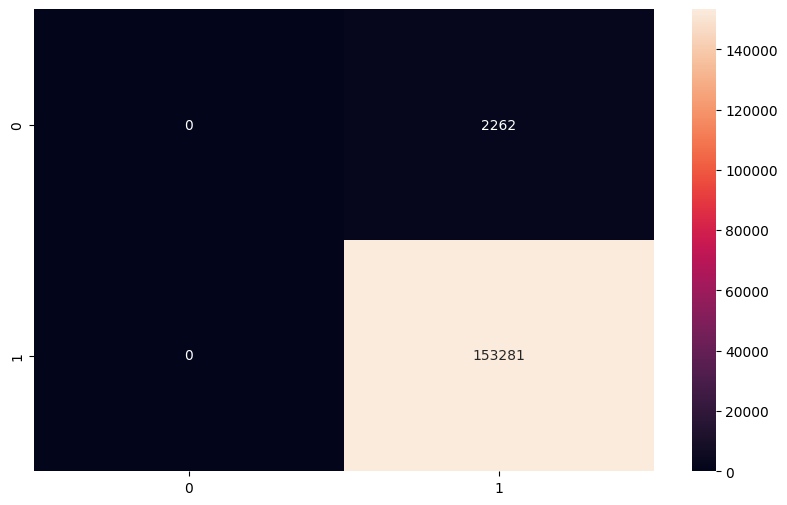

array([[     0,   2262],
       [     0, 153281]])

In [32]:
print("Confusion Matrix: \n")
confusionmatrix(y_test, ada_pred)
print("Confusion Matrix with SMOTE Model: \n")
confusionmatrix(y_test_sm, ada_pred_sm)
print("Confusion Matrix without month_balance column: \n")
confusionmatrix(y_test_wo_month_bal, ada_pred_wo_month_bal)

- Feature Importance

Feature Importance: 



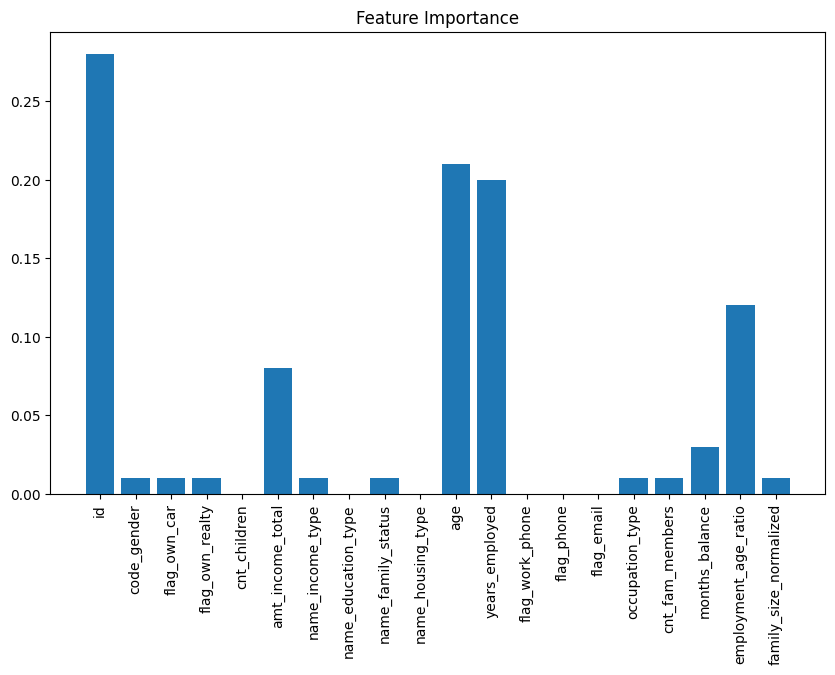

Feature Importance with SMOTE Model: 



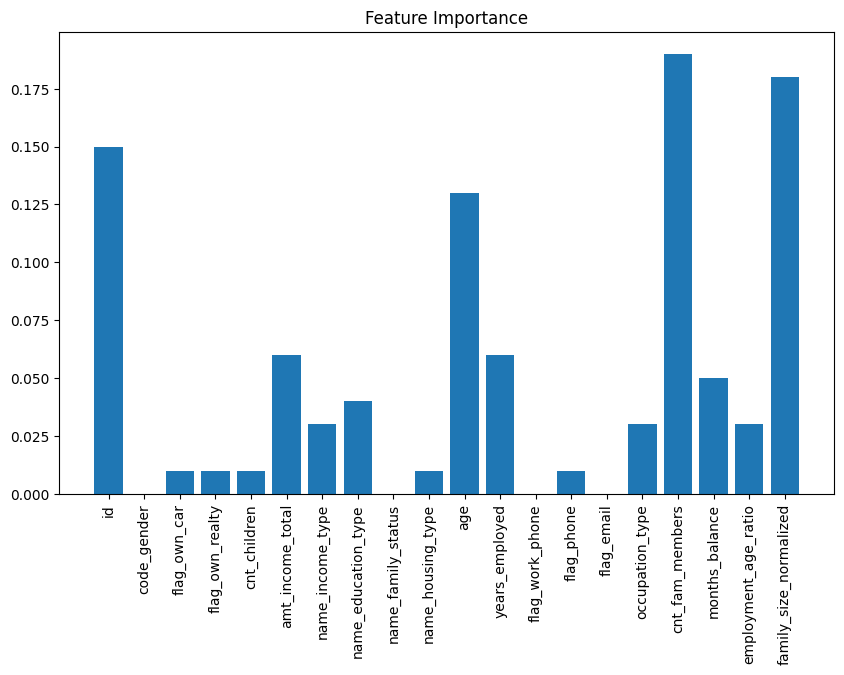

Feature Importance without month_balance column: 



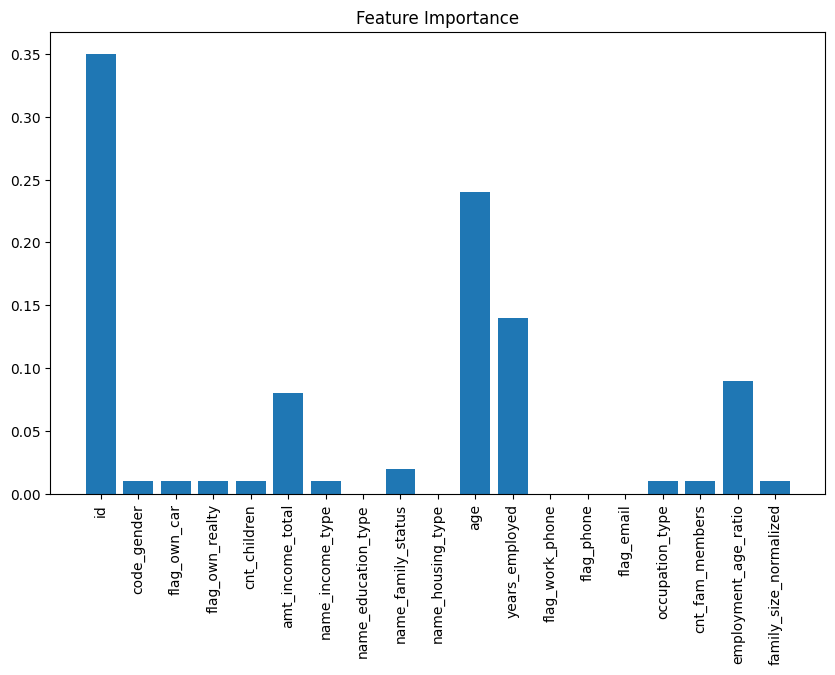

In [33]:
print("Feature Importance: \n")
plotfeatureimportance(ada, X_train)
print("Feature Importance with SMOTE Model: \n")
plotfeatureimportance(ada_sm, X_train_sm)
print("Feature Importance without month_balance column: \n")
plotfeatureimportance(ada_wo_month_bal, X_train_wo_month_bal)

- PR Curve

PR Curve: 



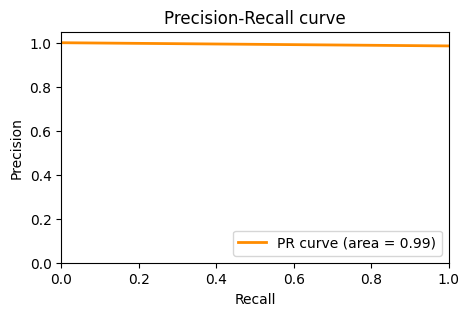

PR Curve with SMOTE Model: 



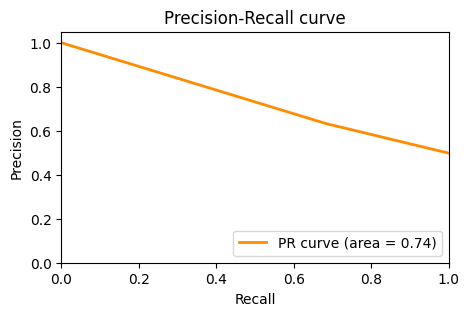

PR Curve without month_balance column: 



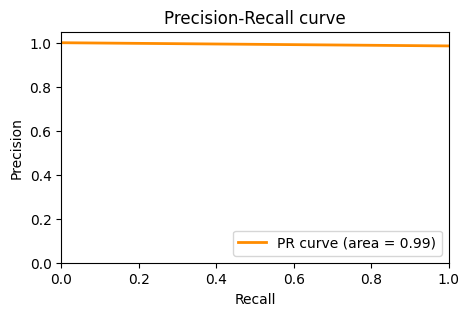

In [34]:
print("PR Curve: \n")
plotpr(y_test, ada_pred)
print("PR Curve with SMOTE Model: \n")
plotpr(y_test_sm, ada_pred_sm)
print("PR Curve without month_balance column: \n")
plotpr(y_test_wo_month_bal, ada_pred_wo_month_bal)

- ROC Curve

ROC Curve: 



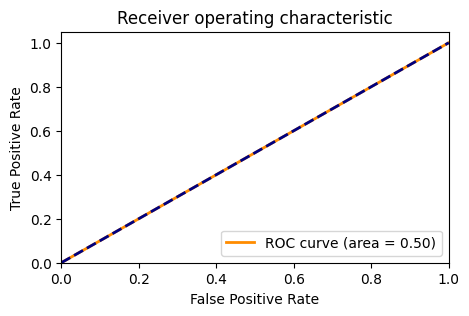

ROC Curve with SMOTE Model: 



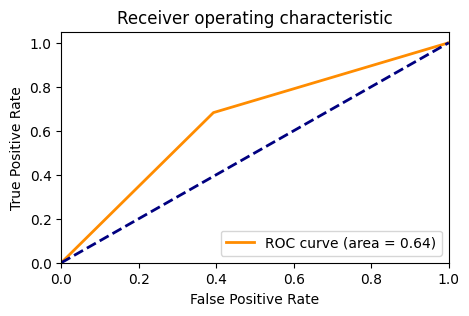

ROC Curve without month_balance column: 



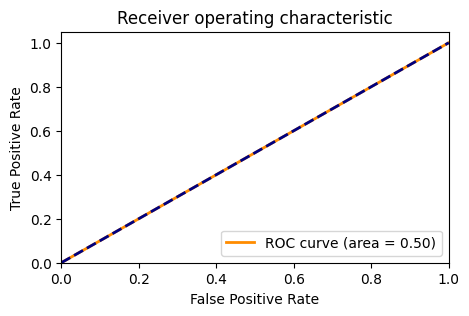

In [35]:
print("ROC Curve: \n")
plotroc(y_test, ada_pred)
print("ROC Curve with SMOTE Model: \n")
plotroc(y_test_sm, ada_pred_sm)
print("ROC Curve without month_balance column: \n")
plotroc(y_test_wo_month_bal, ada_pred_wo_month_bal)

- Learning Curve

Learning Curve: 



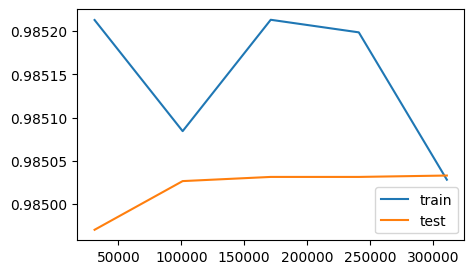

Learning Curve with SMOTE Model: 



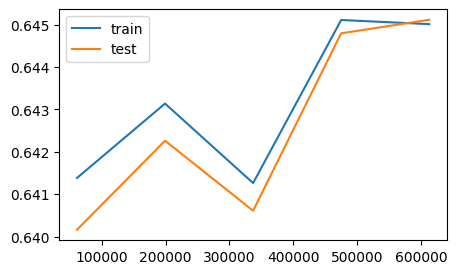

Learning Curve without month_balance column: 



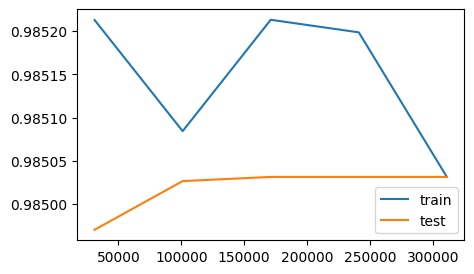

In [36]:
print("Learning Curve: \n")
plotlearningcurve(ada, X_train, y_train)
print("Learning Curve with SMOTE Model: \n")
plotlearningcurve(ada_sm, X_train_sm, y_train_sm)
print("Learning Curve without month_balance column: \n")
plotlearningcurve(ada_wo_month_bal, X_train_wo_month_bal, y_train_wo_month_bal)

## Logistic Regression

In [8]:
lr = logisticRegression(X_train, y_train, C=1.0, penalty='l2', solver='lbfgs')
lr_sm = logisticRegression(X_train_sm, y_train_sm, C=1.0, penalty='l2', solver='lbfgs')
lr_wo_month_bal = logisticRegression(X_train_wo_month_bal, y_train_wo_month_bal, C=1.0, penalty='l2', solver='lbfgs')

In [9]:
lr_pred = lr.predict(X_test)
lr_pred_sm = lr_sm.predict(X_test_sm)
lr_pred_wo_month_bal = lr_wo_month_bal.predict(X_test_wo_month_bal)

print("Prediction on test data without SMOTE: ", accuracy_score(y_test, lr_pred))
print("Prediction on test data with SMOTE: ", accuracy_score(y_test_sm, lr_pred_sm))  
print("Prediction on test data without month_balance column: ", accuracy_score(y_test_wo_month_bal, lr_pred_wo_month_bal))

Prediction on test data without SMOTE:  0.9854573976328089
Prediction on test data with SMOTE:  0.5056451823426528
Prediction on test data without month_balance column:  0.9854573976328089


- Print Metrics

In [10]:
print("Metrics on test data without SMOTE: \n")
printmetrics(y_test, lr_pred)
print("Metrics on test data with SMOTE: \n")
printmetrics(y_test_sm, lr_pred_sm)
print("Metrics on test data without month_balance column: \n")
printmetrics(y_test_wo_month_bal, lr_pred_wo_month_bal)

Metrics on test data without SMOTE: 

Accuracy:  0.9854573976328089
Recall:  1.0
Precision:  0.9854573976328089
F1:  0.9926754397326633
ROC AUC:  0.5
MSE:  0.014542602367191066
Metrics on test data with SMOTE: 

Accuracy:  0.5056451823426528
Recall:  0.6183595772146756
Precision:  0.5029553945944794
F1:  0.5547188666490316
ROC AUC:  0.5061001455807338
MSE:  0.49435481765734723
Metrics on test data without month_balance column: 

Accuracy:  0.9854573976328089
Recall:  1.0
Precision:  0.9854573976328089
F1:  0.9926754397326633
ROC AUC:  0.5
MSE:  0.014542602367191066


- Confusion Matrix

Confusion Matrix: 



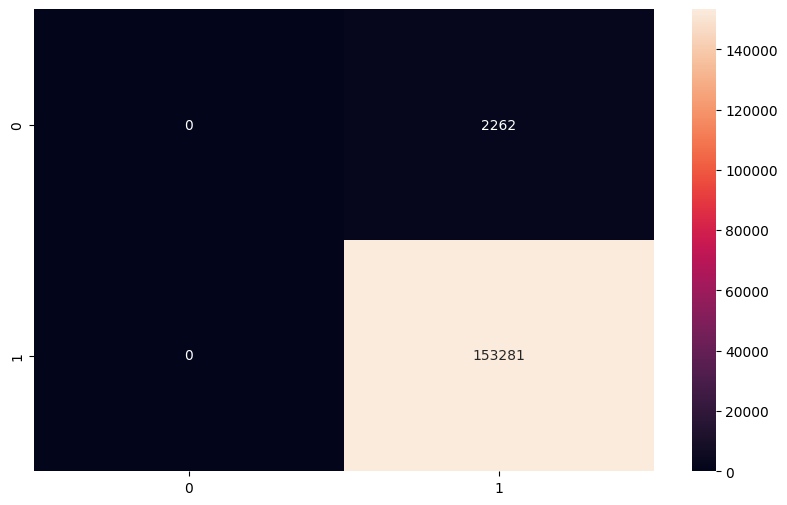

Confusion Matrix with SMOTE Model: 



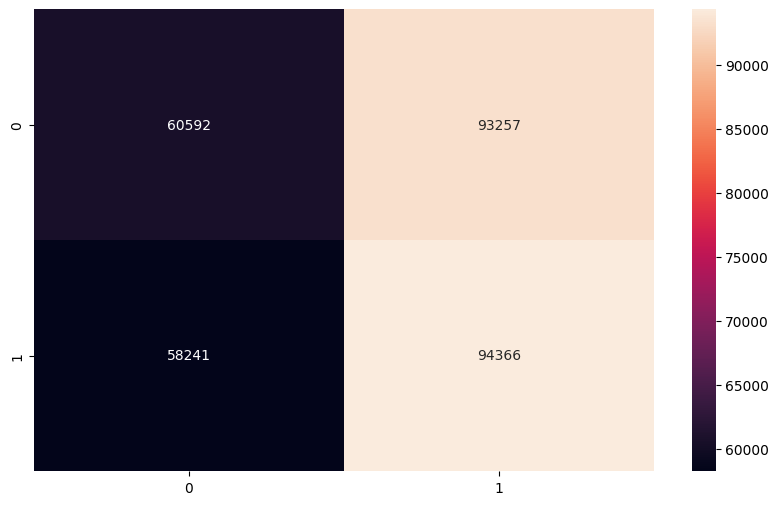

Confusion Matrix without month_balance column: 



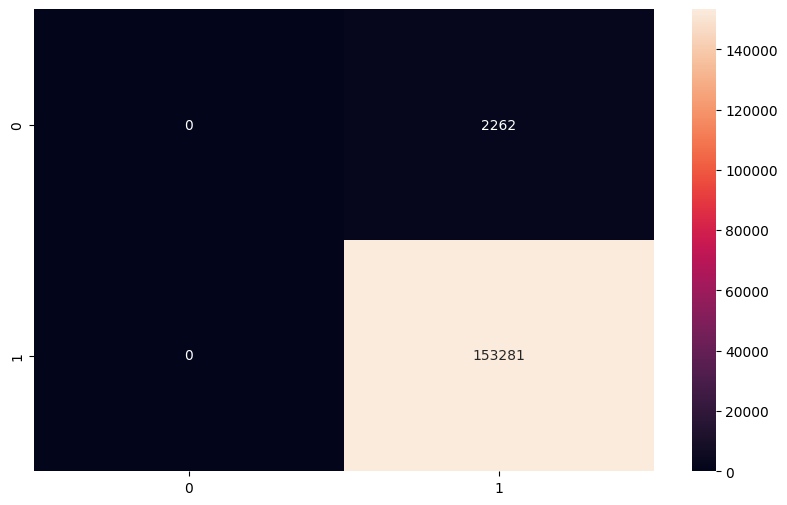

array([[     0,   2262],
       [     0, 153281]])

In [11]:
print("Confusion Matrix: \n")
confusionmatrix(y_test, lr_pred)
print("Confusion Matrix with SMOTE Model: \n")
confusionmatrix(y_test_sm, lr_pred_sm)
print("Confusion Matrix without month_balance column: \n")
confusionmatrix(y_test_wo_month_bal, lr_pred_wo_month_bal)

- PR Curve

PR Curve: 



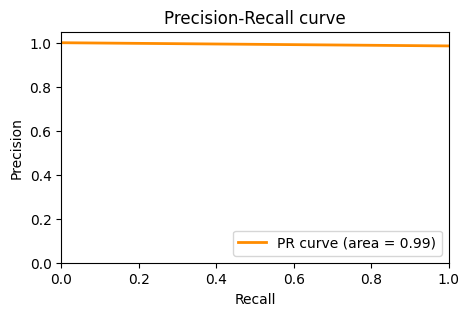

PR Curve with SMOTE Model: 



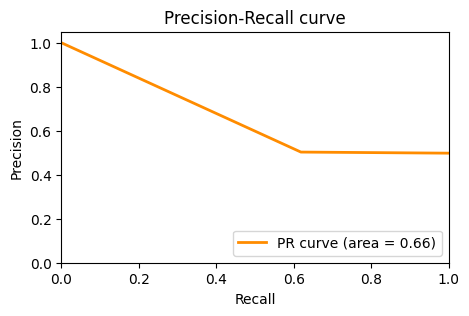

PR Curve without month_balance column: 



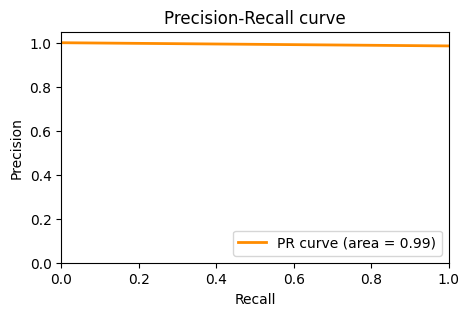

In [13]:
print("PR Curve: \n")
plotpr(y_test, lr_pred)
print("PR Curve with SMOTE Model: \n")
plotpr(y_test_sm, lr_pred_sm)
print("PR Curve without month_balance column: \n")
plotpr(y_test_wo_month_bal, lr_pred_wo_month_bal)

- ROC Curve

ROC Curve: 



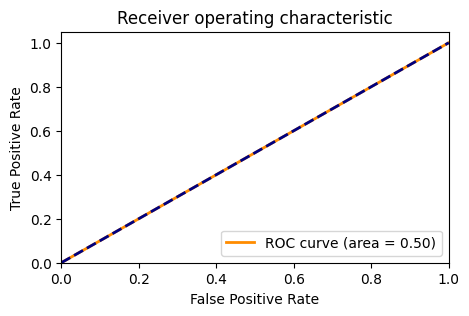

ROC Curve with SMOTE Model: 



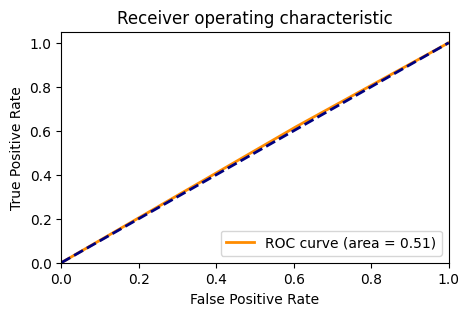

ROC Curve without month_balance column: 



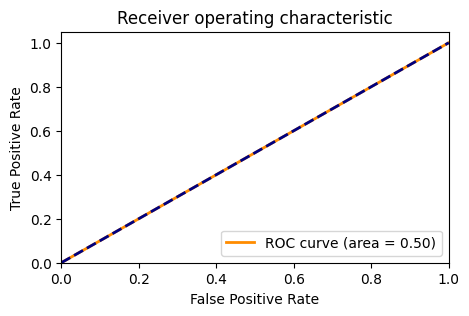

In [14]:
print("ROC Curve: \n")
plotroc(y_test, lr_pred)
print("ROC Curve with SMOTE Model: \n")
plotroc(y_test_sm, lr_pred_sm)
print("ROC Curve without month_balance column: \n")
plotroc(y_test_wo_month_bal, lr_pred_wo_month_bal)

- Learning Curve

Learning Curve: 



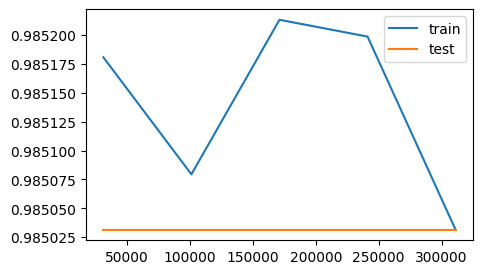

Learning Curve with SMOTE Model: 



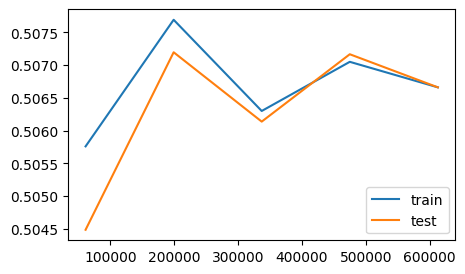

Learning Curve without month_balance column: 



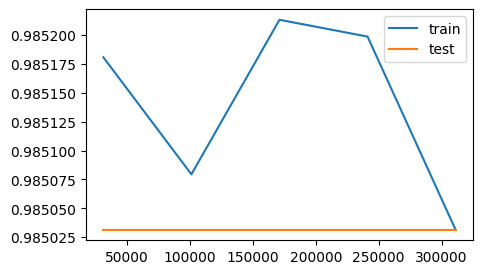

In [15]:
print("Learning Curve: \n")
plotlearningcurve(lr, X_train, y_train)
print("Learning Curve with SMOTE Model: \n")
plotlearningcurve(lr_sm, X_train_sm, y_train_sm)
print("Learning Curve without month_balance column: \n")
plotlearningcurve(lr_wo_month_bal, X_train_wo_month_bal, y_train_wo_month_bal)

## Grid Search

In [ ]:
model_dict = {'Random Forest': RandomForestClassifier(),
                'Decision Tree': DecisionTreeClassifier(),
                'Logistic Regression': LogisticRegression(),
                'XGBoost': XGBClassifier(),
                'AdaBoost': AdaBoostClassifier()
                }

parameters = {  'Random Forest': {'n_estimators': [100, 300],
                                'max_features': ['auto', 'sqrt'],
                                },

                'Decision Tree': {'max_depth': [15, 25],
                                'min_samples_leaf': [1, 4]},

                'Logistic Regression': {'C': [0.1, 10, 1000],
                                      'solver': ['newton-cg', 'lbfgs', 'sag']
                                      },
                                      
                'XGBoost': {'learning_rate': [0.001, 0.1, 0.3],
                            'n_estimators': [100, 300, 500],},

                'AdaBoost': {'n_estimators': [150, 250, 300],
                            'learning_rate': [0.01, 0.1, 1]}
                }


best_model_dict = {}
for model_name, model in model_dict.items():
    best_model = gridSearch(model, parameters[model_name], X_train, y_train, cv=2, scoring='accuracy', model_name=model_name)
    best_model_dict[model_name] = best_model.best_estimator_


From our analysis, we found that the best model is the one without SMOTE and with month_balance column. So that we selected normal X_train and y_train

In [18]:
# From grid search best model should be XGBoost with parameters {'learning_rate': 0.1, 'n_estimators': 100}
xgb_best = XGBClassifier(learning_rate=0.1, n_estimators=100)
xgb_best.fit(X_train, y_train)
xgb_best_pred = xgb_best.predict(X_test)


- Print Metrics

In [19]:
print("Print Metrics for best model: \n")
printmetrics(y_test, xgb_best_pred)

Print Metrics for best model: 

Accuracy:  0.9857724230598612
Recall:  0.9999282363763284
Precision:  0.985836677987033
F1:  0.9928324583080974
ROC AUC:  0.5132267176576603
MSE:  0.01422757694013874


- Confusion Matrix

Plot Confusion Matrix for Best Model:



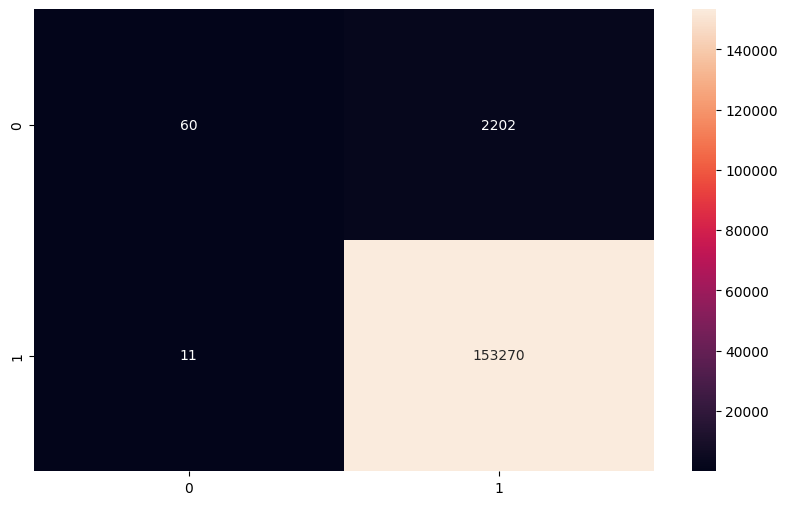

array([[    60,   2202],
       [    11, 153270]])

In [20]:
print("Plot Confusion Matrix for Best Model:\n")
confusionmatrix(y_test, xgb_best_pred)

- PR Curve

Plot PR Curve for Best Model:



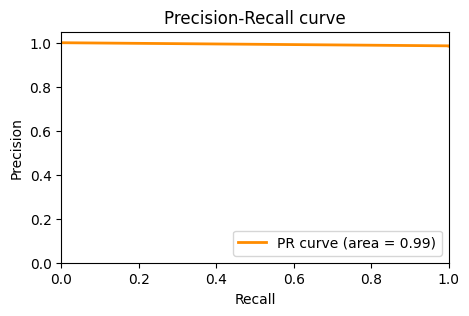

In [21]:
print("Plot PR Curve for Best Model:\n")
plotpr(y_test, xgb_best_pred)

- ROC Curve

Plot ROC Curve for Best Model:



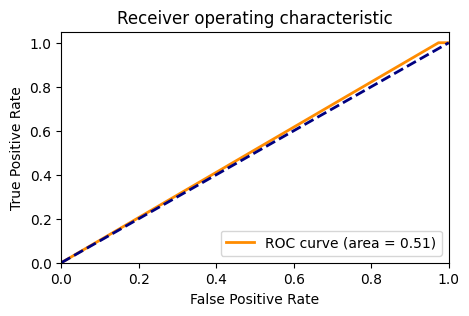

In [22]:
print("Plot ROC Curve for Best Model:\n")
plotroc(y_test, xgb_best_pred)

- Learning Curve

Plot Learning Curve for Best Model:



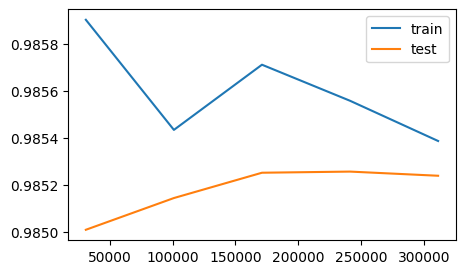

In [23]:
print("Plot Learning Curve for Best Model:\n")
plotlearningcurve(xgb_best, X_train, y_train)

- Validation Curve

Plot Validation Curve for Best Model:



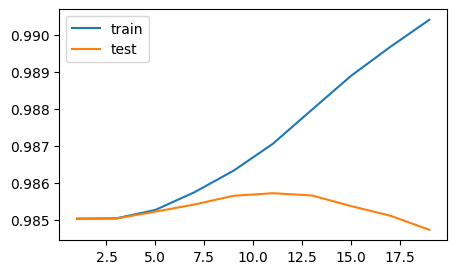

In [24]:
print("Plot Validation Curve for Best Model:\n")
plotValidationCurve(xgb_best, X_train, y_train, 'max_depth', np.arange(1, 20, 2))